In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [7]:
import os
import shutil

source_path = "/kaggle/input/gtsrb-german-traffic-sign"
destination_path = "/content/"

try:
    shutil.move(source_path, destination_path)
    print(f"Dataset moved from {source_path} to {destination_path}")
except Exception as e:
    print(f"Error moving dataset: {e}")

Error moving dataset: [Errno 30] Read-only file system: '37.png'


In [9]:
import os
import shutil

directories_to_delete = [
    "/content/gtsrb-german-traffic-sign/train",
    "/content/gtsrb-german-traffic-sign/test",
    "/content/gtsrb-german-traffic-sign/meta"
]

for directory in directories_to_delete:
    try:
        shutil.rmtree(directory)
        print(f"Deleted directory: {directory}")
    except OSError as e:
        print(f"Error deleting directory {directory}: {e}")

Deleted directory: /content/gtsrb-german-traffic-sign/train
Deleted directory: /content/gtsrb-german-traffic-sign/test
Deleted directory: /content/gtsrb-german-traffic-sign/meta


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=10,       # Rotate images by up to 10 degrees
    zoom_range=0.1,          # Zoom in on images by up to 10%
    width_shift_range=0.1,   # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.1,         # Shear images by up to 10%
    horizontal_flip=False,    # Do not flip horizontally for traffic signs
    vertical_flip=False,      # Do not flip vertically for traffic signs
    validation_split=0.2      # Split 20% of the data for validation
)

# Define parameters for the test data (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/content/gtsrb-german-traffic-sign/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/gtsrb-german-traffic-sign/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [23]:
import pandas as pd
import os

# Load the test CSV file
test_csv_path = '/content/gtsrb-german-traffic-sign/Test.csv'
test_df = pd.read_csv(test_csv_path)

# Display the first few rows and the column names to understand the structure
print("Test CSV DataFrame head:")
display(test_df.head())
print("\nTest CSV DataFrame columns:")
print(test_df.columns)

Test CSV DataFrame head:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png



Test CSV DataFrame columns:
Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming test_datagen is already defined as in cell 688555e1
# test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming test_df is already loaded as in cell 614517c6
# test_csv_path = '/content/gtsrb-german-traffic-sign/Test.csv'
# test_df = pd.read_csv(test_csv_path)

# Convert the ClassId column to string type
test_df['ClassId'] = test_df['ClassId'].astype(str)

# Define the directory containing the test images
test_image_dir = '/content/gtsrb-german-traffic-sign/' # The 'Path' column in the CSV is relative to this directory

# Create the test data generator using flow_from_dataframe
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_image_dir,
    x_col='Path',         # Column with image file paths
    y_col='ClassId',      # Column with class labels
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # Assuming your model expects one-hot encoded labels
    shuffle=False          # Keep the order of test images for evaluation
)

print("\nTest data generator created successfully.")

Found 12630 validated image filenames belonging to 43 classes.

Test data generator created successfully.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add the first convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

# Add additional convolutional and pooling layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the dense layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))

# Add the output dense layer
# The number of neurons should be equal to the number of classes (43 in this dataset)
num_classes = 43
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,174,507 (42.63 MB)

 Trainable params: 11,174,507 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model




In [28]:
# Configure the model for training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


## Train the model


In [29]:
# Calculate steps per epoch for training and validation
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10, # Set a reasonable number of epochs
    validation_data=validation_generator,
    validation_steps=validation_steps
)

print("\nModel training completed.")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 434s 436ms/step - accuracy: 0.3382 - loss: 2.3664 - val_accuracy: 0.4675 - val_loss: 1.9989
Epoch 2/10
  1/980 ━━━━━━━━━━━━━━━━━━━━ 1:00 62ms/step - accuracy: 0.7812 - loss: 0.8365

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


980/980 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.7812 - loss: 0.8365 - val_accuracy: 0.4682 - val_loss: 2.0114
Epoch 3/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 473s 432ms/step - accuracy: 0.7139 - loss: 0.8935 - val_accuracy: 0.5606 - val_loss: 1.7775
Epoch 4/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.7500 - loss: 0.8849 - val_accuracy: 0.5818 - val_loss: 1.7012
Epoch 5/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 442s 451ms/step - accuracy: 0.8285 - loss: 0.5403 - val_accuracy: 0.6213 - val_loss: 1.5441
Epoch 6/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.7500 - loss: 0.4433 - val_accuracy: 0.6233 - val_loss: 1.4962
Epoch 7/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 504s 475ms/step - accuracy: 0.8734 - loss: 0.3849 - val_accuracy: 0.6583 - val_loss: 1.4594
Epoch 8/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9062 - loss: 0.2905 - val_accuracy: 0.6559 - val_loss: 1.4733
Epoch 9/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 431s 421ms/step - accuracy: 0.9044 - loss: 0.2995 - val

In [32]:
# Evaluate the model on the test data
print("\nEvaluating the model on the test data...")
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the model on the test data...
  1/395 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.9375 - loss: 0.3952

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8014 - loss: 0.8309
Test Loss: 0.8498
Test Accuracy: 0.7983


#  pre-trained model (e.g., MobileNet)

In [33]:
from tensorflow.keras.applications.mobilenet import MobileNet

# Load the MobileNet model, excluding the top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print the model summary to verify
base_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [34]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Add a GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer with 128 units and relu activation
x = Dense(128, activation='relu')(x)

# Add the final output dense layer with 43 units and softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Print the model summary
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,365,611 (12.84 MB)

 Trainable params: 3,343,723 (12.76 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [35]:
# Configure the model for training
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [36]:
from tensorflow.keras.optimizers import Adam

# 1. Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

# 2. Compile the model again to apply the changes
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled with base layers frozen.")

# 3. Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# 4. Train the model for a few epochs (e.g., 5)
print("\nStarting initial training (frozen layers)...")
history_frozen = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

print("\nInitial training completed.")

# 5. Unfreeze the layers of the base_model for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# 6. Compile the model again with a lower learning rate for fine-tuning
# Using Adam with a lower learning rate (e.g., 0.0001)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModel compiled with base layers unfrozen for fine-tuning.")

# 7. Continue training for additional epochs (e.g., 5 more)
print("\nStarting fine-tuning...")
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5, # Additional epochs for fine-tuning
    initial_epoch=5, # Start from epoch 5 (after initial 5 epochs)
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# 8. Print a message indicating that model training is completed.
print("\nModel training completed.")

Model compiled with base layers frozen.

Starting initial training (frozen layers)...
Epoch 1/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 432s 435ms/step - accuracy: 0.6424 - loss: 1.2802 - val_accuracy: 0.7665 - val_loss: 0.8212
Epoch 2/5
  1/980 ━━━━━━━━━━━━━━━━━━━━ 35s 36ms/step - accuracy: 0.8438 - loss: 0.4060

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


980/980 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8438 - loss: 0.4060 - val_accuracy: 0.7704 - val_loss: 0.8061
Epoch 3/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 472s 429ms/step - accuracy: 0.9014 - loss: 0.3077 - val_accuracy: 0.7741 - val_loss: 0.7784
Epoch 4/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.8750 - loss: 0.3555 - val_accuracy: 0.7708 - val_loss: 0.7829
Epoch 5/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 441s 450ms/step - accuracy: 0.9247 - loss: 0.2297 - val_accuracy: 0.7848 - val_loss: 0.8035

Initial training completed.

Model compiled with base layers unfrozen for fine-tuning.

Starting fine-tuning...

Model training completed.


In [39]:
# Evaluate the model on the test data
print("\nEvaluating the model on the test data...")
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the model on the test data...
395/395 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.8240 - loss: 0.6212
Test Loss: 0.6350
Test Accuracy: 0.8190


In [40]:
print(type(history))
print(type(history_frozen))
print(type(history_finetune))

<class 'keras.src.callbacks.history.History'>
<class 'keras.src.callbacks.history.History'>
<class 'keras.src.callbacks.history.History'>


In [41]:
# Extract metrics for the custom CNN
custom_cnn_train_acc = history.history['accuracy']
custom_cnn_train_loss = history.history['loss']
custom_cnn_val_acc = history.history['val_accuracy']
custom_cnn_val_loss = history.history['val_loss']

# Extract and combine metrics for the pre-trained model (frozen + fine-tuning)
pretrained_train_acc = history_frozen.history['accuracy'] + history_finetune.history['accuracy']
pretrained_train_loss = history_frozen.history['loss'] + history_finetune.history['loss']
pretrained_val_acc = history_frozen.history['val_accuracy'] + history_finetune.history['val_accuracy']
pretrained_val_loss = history_frozen.history['val_loss'] + history_finetune.history['val_loss']

print("Training history metrics extracted and combined successfully.")

KeyError: 'accuracy'

**Reasoning**:
The previous code failed because the key 'accuracy' was not found in the history dictionary. I need to inspect the keys available in the history objects to find the correct key for accuracy.



In [42]:
print("Keys in history.history:", history.history.keys())
print("Keys in history_frozen.history:", history_frozen.history.keys())
print("Keys in history_finetune.history:", history_finetune.history.keys())

Keys in history.history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Keys in history_frozen.history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Keys in history_finetune.history: dict_keys([])


In [43]:
from tensorflow.keras.optimizers import Adam

# 1. Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

# 2. Compile the model again to apply the changes
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled with base layers frozen.")

# 3. Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# 4. Train the model for a few epochs (e.g., 5)
print("\nStarting initial training (frozen layers)...")
history_frozen = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

print("\nInitial training completed.")

# 5. Unfreeze the layers of the base_model for fine-tuning
for layer in base_model.layers:
    layer.trainable = True

# 6. Compile the model again with a lower learning rate for fine-tuning
# Using Adam with a lower learning rate (e.g., 0.0001)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\nModel compiled with base layers unfrozen for fine-tuning.")

# 7. Continue training for additional epochs (e.g., 5 more)
print("\nStarting fine-tuning...")
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10, # Total epochs will be 10 (5 initial + 5 fine-tuning)
    initial_epoch=5, # Start from epoch 5 (after initial 5 epochs)
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# 8. Print a message indicating that model training is completed.
print("\nModel training completed.")

Model compiled with base layers frozen.

Starting initial training (frozen layers)...
Epoch 1/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 416s 420ms/step - accuracy: 0.9347 - loss: 0.1934 - val_accuracy: 0.7974 - val_loss: 0.8124
Epoch 2/5
  1/980 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9062 - loss: 0.1462

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


980/980 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.9062 - loss: 0.1462 - val_accuracy: 0.7957 - val_loss: 0.8190
Epoch 3/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 443s 452ms/step - accuracy: 0.9433 - loss: 0.1671 - val_accuracy: 0.7990 - val_loss: 0.8260
Epoch 4/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 1.0000 - loss: 0.0451 - val_accuracy: 0.7966 - val_loss: 0.8197
Epoch 5/5
980/980 ━━━━━━━━━━━━━━━━━━━━ 502s 474ms/step - accuracy: 0.9535 - loss: 0.1372 - val_accuracy: 0.7927 - val_loss: 0.8599

Initial training completed.

Model compiled with base layers unfrozen for fine-tuning.

Starting fine-tuning...
Epoch 6/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 468s 453ms/step - accuracy: 0.8805 - loss: 0.4933 - val_accuracy: 0.9091 - val_loss: 0.3549
Epoch 7/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9375 - loss: 0.3104 - val_accuracy: 0.9157 - val_loss: 0.3478
Epoch 8/10
980/980 ━━━━━━━━━━━━━━━━━━━━ 443s 452ms/step - accuracy: 0.9883 - loss: 0.0360 - val_accuracy: 0.9302 - 

In [48]:
!find /content -name "*.csv"
!find / -name "*.csv"

/content/gtsrb-german-traffic-sign/Train.csv
/content/gtsrb-german-traffic-sign/Test.csv
/content/gtsrb-german-traffic-sign/Meta.csv
/content/gtsrb-german-traffic-sign/Test/GT-final_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/breast_cancer.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/linnerud_physiological.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/linnerud_exercise.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/wine_data.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/iris.csv
/usr/local/lib/python3.11/dist-packages/sklearn/datasets/data/boston_house_prices.csv
/usr/local/lib/python3.11/dist-packages/tornado/test/csv_translations/fr_FR.csv
/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/sampl

In [49]:
# Extract metrics for the custom CNN
custom_cnn_train_acc = history.history['accuracy']
custom_cnn_train_loss = history.history['loss']
custom_cnn_val_acc = history.history['val_accuracy']
custom_cnn_val_loss = history.history['val_loss']

# Extract and combine metrics for the pre-trained model (frozen + fine-tuning)
pretrained_train_acc = history_frozen.history['accuracy'] + history_finetune.history['accuracy']
pretrained_train_loss = history_frozen.history['loss'] + history_finetune.history['loss']
pretrained_val_acc = history_frozen.history['val_accuracy'] + history_finetune.history['val_accuracy']
pretrained_val_loss = history_frozen.history['val_loss'] + history_finetune.history['val_loss']

print("Training history metrics extracted and combined successfully.")

Training history metrics extracted and combined successfully.


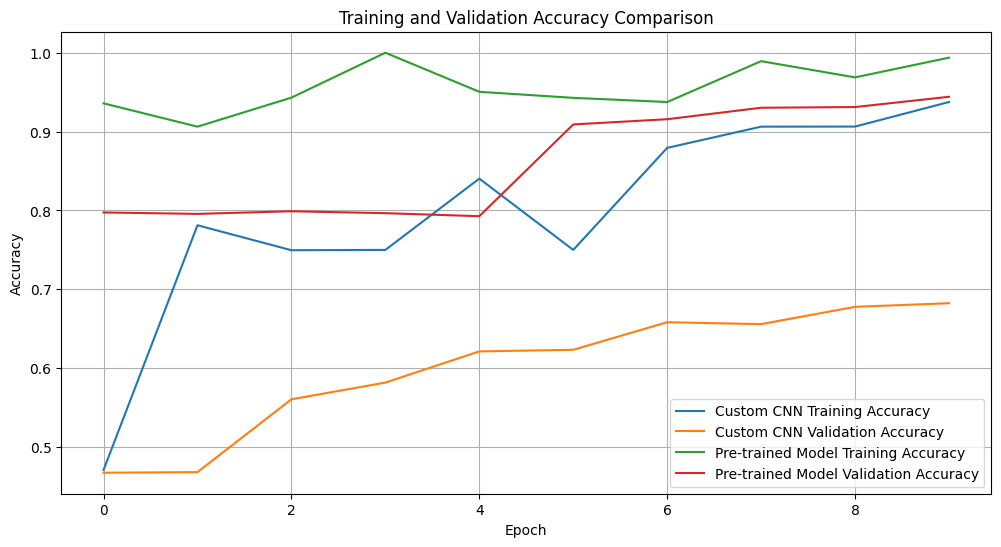

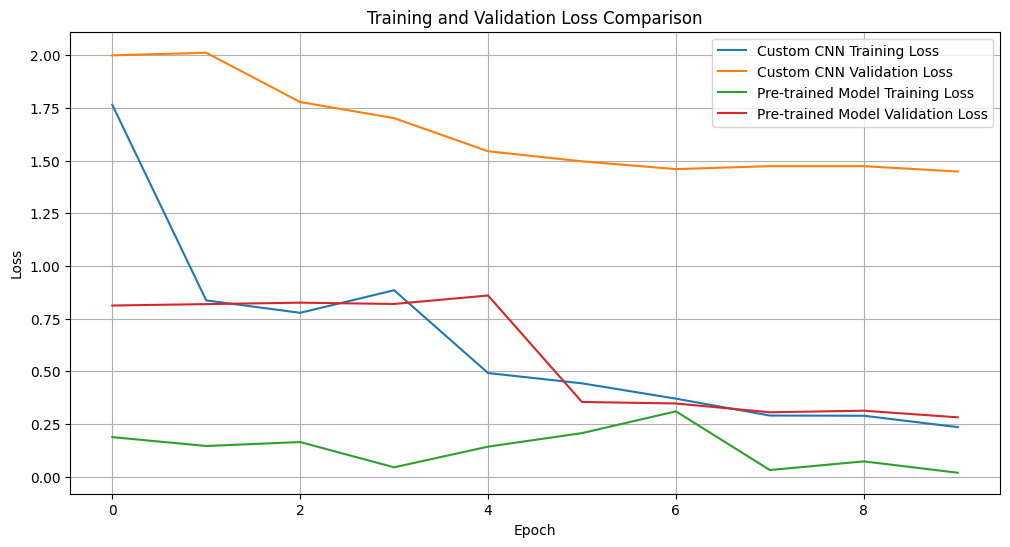

In [50]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(custom_cnn_train_acc, label='Custom CNN Training Accuracy')
plt.plot(custom_cnn_val_acc, label='Custom CNN Validation Accuracy')
plt.plot(pretrained_train_acc, label='Pre-trained Model Training Accuracy')
plt.plot(pretrained_val_acc, label='Pre-trained Model Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(custom_cnn_train_loss, label='Custom CNN Training Loss')
plt.plot(custom_cnn_val_loss, label='Custom CNN Validation Loss')
plt.plot(pretrained_train_loss, label='Pre-trained Model Training Loss')
plt.plot(pretrained_val_loss, label='Pre-trained Model Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()